# Bike Sharing Assignment
We have a dataset with information related to bike sharing rental service. Our aim is to identify which variables are significant in the prediction of demand. Also, we want to identify how well each variable predicts the demand.

### -------------------------------------------------------Data Cleaning---------------------------------------------------------
First, we will perform some checks to see if data is clean. Else we will clean it.
We clean this data in following order.<br>
1) Dropping/imputing rows.<br>

2) Dropping columns.<br>

3) Cleaning values: For example, data type conversion, creating dummy variables.<br>

 <br>
 <br>
 Note: We may still drop/ignore certain columns during analysis if they are not found to be useful

In [1]:
#importing packages
import pandas as pd
pd.options.mode.chained_assignment = None  # to ignore SettingWithCopyWarning
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data in to variable named 'df'
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#we see 730 rows and 16 columns initially
df.shape

(730, 16)

In [4]:
#checking what percentage of each column is null
null_percentage=df.isnull().sum() * 100 / df.shape[0]
null_percentage  #there are not any null values in any of the columns

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Row cleaning: Since there are no null values in the input dataset, we dont need to drop or impute any rows based on that. Next, we will check if there are any rows that indicate totals, subtotals, headers, footers, page numbers, column numbers, blank rows, page numbers

In [5]:
#df.describe()
len(df.dteday.unique())#all rows have date as unique and non-null, this means there are not any rows like totals/subtotals that sneaked in
#there is no need to drop any rows

730

In [6]:
df.dtypes # there is only one object field dteday

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Column cleaning: Since there are no null values in the input dataset, we directly jump to other column validations.

In [7]:
#checking if any columns has just one value throughout
mono_list=(df.nunique().sort_values()).loc[df.nunique().sort_values()==1].index.tolist()
mono_list#there is not any column where all rows have same value, nothing to drop there

[]

In [8]:
#finding the columns that have all values as unique
diverse_list=(df.nunique().sort_values()).loc[df.nunique().sort_values()==len(df)].index.tolist()
diverse_list#we got instant and dteday where all row values unique
#'instant' is a serial number that we actually dont need for model building, we will ignore it when slicing
#'dteday' is a date field, not a category field. For now we will keep this field.

['instant', 'dteday']

Column analysis: Since we have only 13 columns, we will analyse them individually and make any needed changes like type conversion

In [9]:
df.columns#list of columns to analyse

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
#Analysing 'instant'
#As per data dictionary, it's just a index field. We will ignore it when slicing

In [11]:
#Analysing 'dteday'
df.dteday.dtype#this is O type
#let's change it into datetime format. We can ignore this field later if its values are already included in other variables
df.dteday=pd.to_datetime(df.dteday, format='%d-%m-%Y')

In [12]:
#Analysing 'season'
df.season.dtype#this is a integer field, but as per the data dictionary, this is just unordered categorical data
#lets change seasons from numbers to names. This will be helpful when you convert them to dummy variables
df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})#dtype also got converted from int to object

In [13]:
#Analysing 'yr'
df.yr.dtype#this integer with only 0 and 1, which is just fine
#year 0 is for 2018 and 1 is for 2019 so we will have an idea of how dependent variable increases with increase in 1 unit of year

dtype('int64')

In [14]:
#Analysing 'mnth'
df.mnth.dtype#this is a integer field, but as per the data dictionary, this is just unordered categorical data
#lets change months from numbers to names. This will be helpful when you convert them to dummy variables
df.mnth=df.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5: 'May', 6: 'Jun',
                    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12: 'Dec'})#dtype also got converted from int to object

In [15]:
#Analysing 'holiday'
df.holiday.dtype#this integer with only 0 and 1, which is just fine

dtype('int64')

In [16]:
#Analysing 'weekday'
df.weekday.dtype#this is a integer field, but as per the data dictionary, this is just categorical data, one number represents one day
#lets change weekdays from numbers to names. This will be helpful when you convert them to dummy variables
df.weekday=df.weekday.map({0:'Tue',1:'Wed', 2:'Thu', 3:'Fri', 4:'Sat', 5: 'Sun', 6: 'Mon'})#dtype also got converted from int to object

In [17]:
#Analysing 'workingday'
df.workingday.dtype#this integer with only 0 and 1, which is just fine
#we will check if we can drop this column later because working day is all days except mondays and tuesdays and holidays

dtype('int64')

In [18]:
#Analysing 'weathersit'
df.weathersit.value_counts()#there is not even a single instance of heavy rain/snow, we have to build model with available diversity
df.weathersit.dtype#this is a integer field, but as per the data dictionary, this is just unordered categorical data, one number represents one day
#lets change weather situation from numbers to names. This will be helpful when you convert them to dummy variables
df.weathersit=df.weathersit.map({1:'Clear_Sky', 2:'Misty', 3:'Light_Snow/Rain', 4:'Heavy_Snow/Rain'})#dtype also got converted from int to object

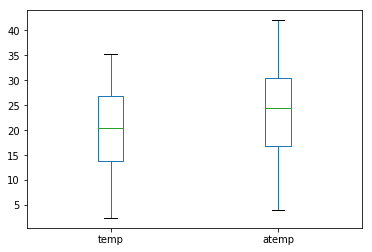

In [19]:
#Analysing temp and atemp
df[['temp','atemp']].plot.box()
plt.show()
#the difference between temp and atemp is that temp is actual temperature and atemp is what it feels like
#for now, we will keep both of them but may use only atemp in model building

#but before that, we have to convert degrees celcius to have only one value after decimal point
df.temp=round(df.temp,1)
df.atemp=round(df.atemp,1)

In [20]:
#Analysing hum
df.hum.dtype#this is a float datatype which is acceptable
#let's convert humidity to have only two values after decimal point as it has significant range
df.hum=round(df.hum,2)

In [21]:
#Analysing windspeed
df.windspeed.dtype#this is a float datatype which is acceptable
#let's convert windspeed to have only two values after decimal point as it has significant range
df.windspeed=round(df.windspeed,2)

In [22]:
#Analysing casual, registered and cnt
#count is a sum of casual and registered users
#we will check if this is true throughout
df.loc[df.casual+df.registered==df.cnt].cnt.count()#the sum is equal to count for all rows
#we can drop casual and registered columns as the client is concerned in overall count rather than number of registered and causal users.
#keeping these fields only causes more redundancy in model because count=registered+casual

730

In [23]:
#after renaming categories from numbers to names
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,0,Misty,14.1,18.2,80.58,10.75,331,654,985
1,2,2018-01-02,spring,0,Jan,0,Tue,0,Misty,14.9,17.7,69.61,16.65,131,670,801
2,3,2018-01-03,spring,0,Jan,0,Wed,1,Clear_Sky,8.1,9.5,43.73,16.64,120,1229,1349
3,4,2018-01-04,spring,0,Jan,0,Thu,1,Clear_Sky,8.2,10.6,59.04,10.74,108,1454,1562
4,5,2018-01-05,spring,0,Jan,0,Fri,1,Clear_Sky,9.3,11.5,43.70,12.52,82,1518,1600


### --------------------------------------------------End of Data Cleaning---------------------------------------------------------

### -----------------------------------------------------Data Visualization----------------------------------------------------------

Checking data to identify correlations and outliers

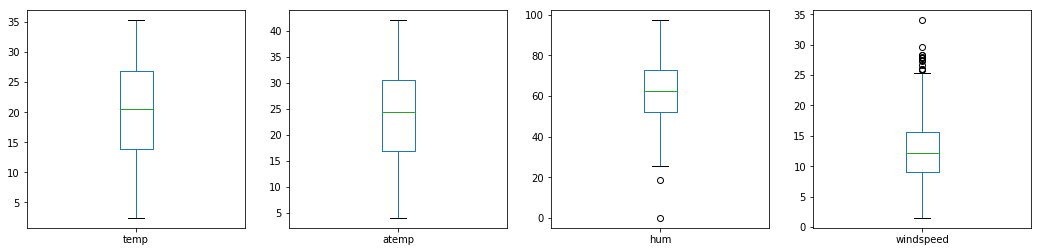

In [24]:
#checking if there are any outliers in the continous varaibles in the data we decided to keep
plt.figure(figsize=(18, 4))
plt.subplot(1,4,1)#1 row, 4 columns, first plot
df.temp.plot.box()
plt.subplot(1,4,2)#1 row, 4 columns, 2nd plot
df.atemp.plot.box()
plt.subplot(1,4,3)#third plot
df.hum.plot.box()
plt.subplot(1,4,4)#fourth plot
df.windspeed.plot.box()
plt.show()
#dont see any outliers for any continous fields other than humidity
#we will analyze the variable further

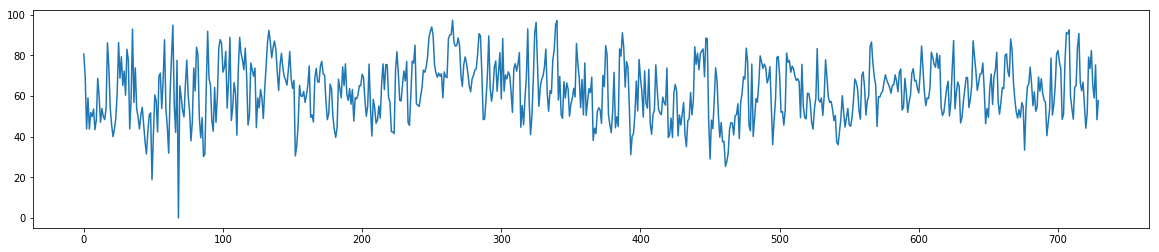

In [25]:
#Checking how frequently humidity reaches zero
plt.figure(figsize=(20, 4))
df.hum.plot()#humidity reached zero only once
#On further research, humidity may not actually reach zero, so we will remove this one row

In [26]:
#print(df.shape)
df=df.loc[df.hum!=0]#removed row where humidity is zero
print(df.shape)#total rows reduced to 729 from 730

(729, 16)


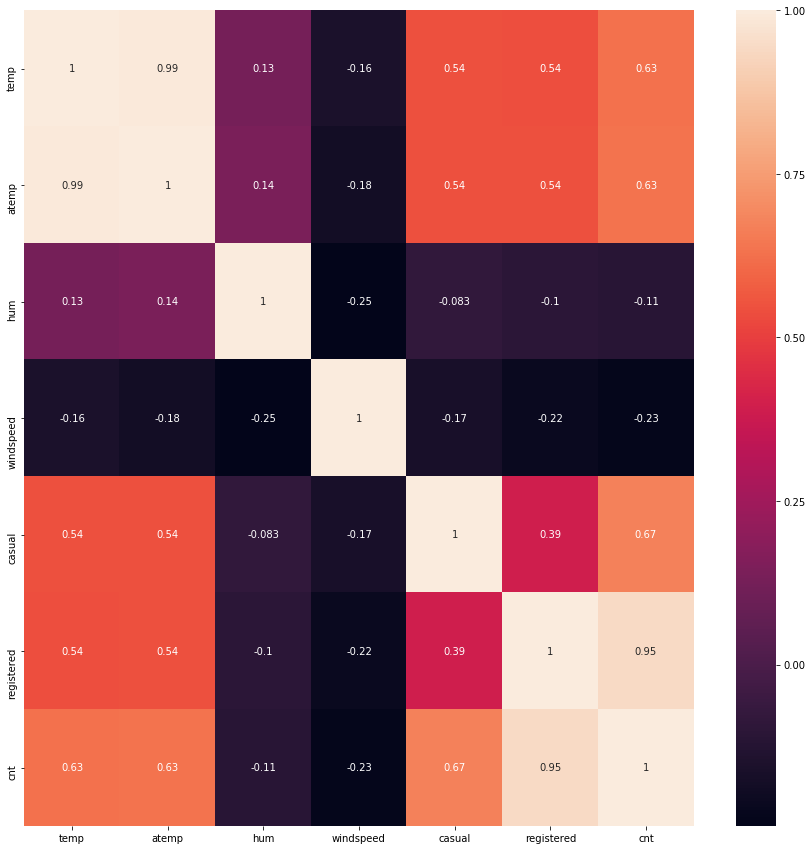

In [27]:
#Checking correlation table to see any correlations that we might have missed identifying
#we will find correlation only for continous variables
plt.figure(figsize=(15,15))
sns.heatmap(df[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(), annot=True)

plt.show()
#there is huge correlation between atemp and temp, we already decided to drop temp
#there is huge correlation between registered and cnt, we already decided to drop registered

In [28]:
#sns.pairplot(df[['temp','atemp','hum','windspeed','casual','registered','cnt']])
#plt.show()

#pairplot has same inferences as heatmap above

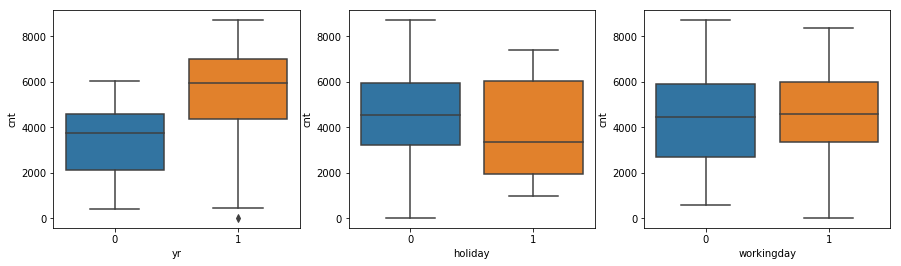

In [29]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
#for increase in 1 year, the demand seems to have clearly increased
#holidays seem to have lesser demand than non-holidays, but holidays are much fewer to jump to any conclusion
#workingday doesnt show any clear pattern

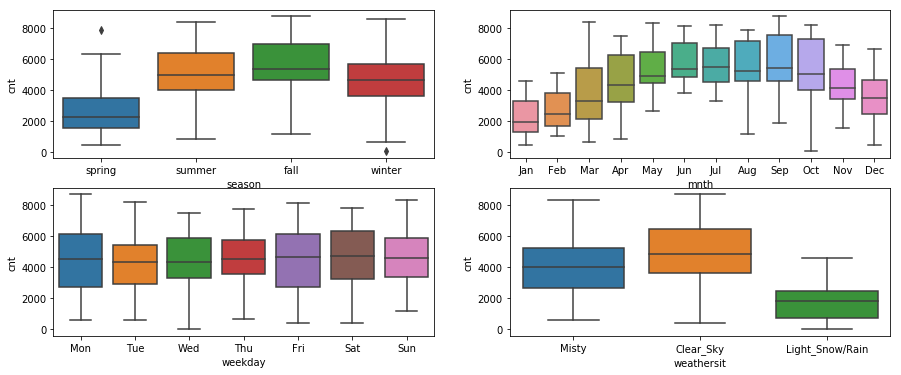

In [30]:
#checking how categories like season, mnth, weekday, weathersit impact count
plt.figure(figsize=(15, 6))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
#spring seems to have less demand and other seasons have better demand
#demand gradually increases from the start of the year and eventually falls at the end of year
#weekday doesnt show any clear pattern
#snow/rain clearly shows drop in demand

### ---------------------------------------------End of Data Visualization----------------------------------------------------

### -----------------------------------------------------Data Preparation--------------------------------------------------------

We will create a new dataframe with only needed columns/variables and create dummy variables for categorical variables

In [31]:
bike_data=df[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'cnt']]
#instant, temp, 'casual' and 'registered' have been ignored when creating new dataframe

Derived metrics: We can add a metric called week of month to see if any particulat week in the month has more or lessd emand

In [32]:
#next, we will get week of the month to see if any particular week in the month has significant demands over other weeks
#months in general have either 30 or31 days except february which has 29 days in leap year and 28 days otherwise
#dividing a month with 7(days of a week) will result in 5 weeks except february, and 5th week will have just 2 or 3 days
#instead, lets divide a month into 4 quadrants by dividing with 8. 4th quadrant will have 6 or 7 days except in february
import math
bike_data['week_of_month']=bike_data['dteday'].dt.day.apply(lambda x: math.ceil(x/8))

In [33]:
#converting week number to appropriate categories
bike_data['week_of_month']=bike_data['week_of_month'].map({1:'1st_Week', 2:'2nd_Week', 3:'3rd_Week', 4:'4th_Week'})#dtype also got converted from int to object
#bike_data[['dteday','week_of_month']].head(40)

In [34]:
#now dteday is no longer needed because its values are already represented by yr, mnth, weekday and week_of_month columns
#print(bike_data.shape)
bike_data.drop('dteday',axis=1, inplace=True)#dropping the column dteday
#print(bike_data.shape)

<b>Creating Dummy variables:</b><br>
Let's create dummy variables for categoric data

In [35]:
#data before adding dummy variables
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,week_of_month
0,spring,0,Jan,0,Mon,0,Misty,18.2,80.58,10.75,985,1st_Week
1,spring,0,Jan,0,Tue,0,Misty,17.7,69.61,16.65,801,1st_Week
2,spring,0,Jan,0,Wed,1,Clear_Sky,9.5,43.73,16.64,1349,1st_Week
3,spring,0,Jan,0,Thu,1,Clear_Sky,10.6,59.04,10.74,1562,1st_Week
4,spring,0,Jan,0,Fri,1,Clear_Sky,11.5,43.70,12.52,1600,1st_Week


In [36]:
#creating dummy variables
cols=['season', 'mnth', 'weekday', 'weathersit', 'week_of_month']#all columns with categories that need to be converted to dummy variables
cate_dum = pd.get_dummies(bike_data[cols], drop_first = True)#note, these new category columns will have original column name prefixed to them, which is convenient, so we are not going to change that
bike_data = pd.concat([bike_data, cate_dum], axis = 1)#concatenating dummy variables with bike_data
bike_data=bike_data.drop(cols,axis=1)#since dummy variables are added as columns, we will drop original categorical columns
#bike_data.shape#now we have 32 columns instead of 12

Note 1: New category column names will have their original column names prefixed to them. If we want to avoid this, we can run as loop for each main category column and add all dummy variables for it in that loop. But the prefixes are quite convinient, so we will keep them.<br>
Note 2: When we drop the first dummy varible, we will not calculate it's coefficient even though the model will be same irrespective of which single dummy variable has been dropped.<br>
Note 3: Dummy varibles are following alphabetical order. As a result of this, the column sequence will not be Jan, Feb, Mar,...

In [37]:
pd.set_option('display.max_columns', 40)#increased the size of display to 40 so that we can see all of 32 columns in one go
bike_data.head()#Updated dataframe with all dummy variables

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow/Rain,weathersit_Misty,week_of_month_2nd_Week,week_of_month_3rd_Week,week_of_month_4th_Week
0,0,0,0,18.2,80.58,10.75,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,0,17.7,69.61,16.65,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,1,9.5,43.73,16.64,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,10.6,59.04,10.74,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.5,43.70,12.52,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<b>Splitting data into train and test groups:</b><br>
Splitting data randomly into 70% training and 30% testing sets

In [38]:
from sklearn.model_selection import train_test_split
bike_data_train, bike_data_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 101)
#used random state(101) to keep the data consistent in all reruns

<b>Scaling continous data:</b><br>
Scaling continous data to fit in the range 0-1<br>
Note: We scale with minmax scaler only on train data

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
cont_vars = ['atemp', 'hum', 'windspeed', 'cnt']#list of columns with continous numeric values
#cnt is an integer field, but since we need scale it to something between 0-1, it will end up being a float
bike_data_train[cont_vars] = scaler.fit_transform(bike_data_train[cont_vars])

bike_data_train.head()
#bike_data_train.shape#train data has 510 rows, test data has remaining 219 rows

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow/Rain,weathersit_Misty,week_of_month_2nd_Week,week_of_month_3rd_Week,week_of_month_4th_Week
53,0,0,1,0.222520,0.299643,0.148000,0.222079,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
118,0,0,1,0.560322,0.343105,0.448615,0.535919,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
505,1,0,1,0.651475,0.794418,0.434462,0.508262,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
60,0,0,1,0.321716,0.333546,0.588308,0.247510,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73,0,0,1,0.319035,0.596227,0.333846,0.238369,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


<b>Splitting train data:</b><br>
We will further split train data into X(all independent variables) and y(dependent variable)

In [41]:
y_train = bike_data_train.pop('cnt')#cnt column has been removed from bike_data_train and assigned to y_train
X_train = bike_data_train#after popping the cnt column, X_train has rest of independent varibles

### -------------------------------------------------End of Data Preparation----------------------------------------------------

### --------------------------------------------------Building Model - Part1-----------------------------------------------------

Since we have 31 independent features, it better to use an automated system to remove less significant features.<br> 
But before that we will see how good the fit is for all 31 features<br>
In part1, we will build a model with all the features, this will help us have a model with minimal error.<br>
Later, in part2, we will use RFE and drop few features on a trial and error basis to arrive at the best fit, while having least number of features<br>
<b>Note: </b>If you get <ins>SVD did not converge</ins> error, rerun the cell manually 

In [42]:
import statsmodels.api as sm

X_train_lreg1 = sm.add_constant(X_train)#adding a column with constant for intercept

lr1 = sm.OLS(y_train, X_train_lreg1).fit()#fitting linear regression model for train data

In [43]:
lr1.params#coefficients of the trained model

const                         0.270533
yr                            0.242809
holiday                       0.005129
workingday                    0.104938
atemp                         0.407459
hum                          -0.165373
windspeed                    -0.154164
season_spring                -0.117507
season_summer                 0.007891
season_winter                 0.073206
mnth_Aug                      0.024740
mnth_Dec                     -0.038743
mnth_Feb                     -0.024604
mnth_Jan                     -0.039972
mnth_Jul                     -0.025711
mnth_Jun                      0.012093
mnth_Mar                      0.031591
mnth_May                      0.033896
mnth_Nov                     -0.059204
mnth_Oct                      0.020210
mnth_Sep                      0.082928
weekday_Mon                   0.105166
weekday_Sat                  -0.006547
weekday_Sun                   0.002516
weekday_Thu                  -0.016109
weekday_Tue              

In [44]:
print(lr1.summary())#summary with R-sqaured error, coefficients and corresponding p-values
#probability of F-statistic is very low, which is a good sign of overall fit
#R-sqaured is 85% which means RSS is quite low compared to TSS
#some coefficients are negative which can mean that a increase in these features may further decrease demand
#and some coefficients have p-value>5%, this means that the probability of that coefficient being 0 is higher

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     96.90
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          1.62e-182
Time:                        11:32:08   Log-Likelihood:                 525.27
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     479   BIC:                            -857.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<b>Residual analysis</b> on the training data<br>
Let's see if the residual errors follow gaussian distribution

In [45]:
y_train_pred = lr1.predict(X_train_lreg1)#predicted y values for training data based on the trained model for all coefficints

C:\Users\Venki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


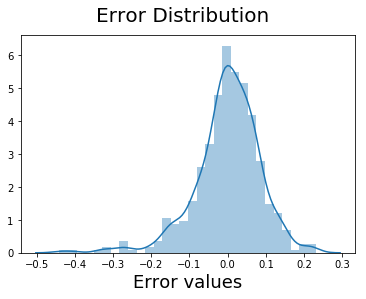

-2.4914710817323366e-16

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)#plotting residual distribution
fig.suptitle('Error Distribution', fontsize = 20)
plt.xlabel('Error values', fontsize = 18) 
plt.show()
#From the figure, we can say that errors are distributed around 0.0
import numpy as np
np.mean(y_train - y_train_pred)#residual average is extremely small, almost zero
#the error distribution is in bell shape, this is gaussian

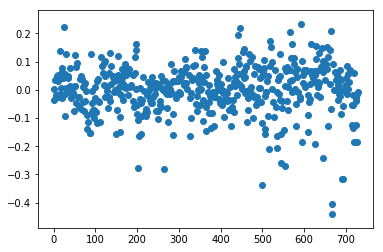

In [47]:
plt.scatter(pd.DataFrame(X_train.index),(y_train - y_train_pred))#plotting the residuals w.r.t each x_train, it shouldnt follow any pattern
plt.show()
#there the residuals seem homoscedastic which seems to be a good sign of the model

<b>Predicting on test data</b>

In [48]:
cont_vars = ['atemp', 'hum', 'windspeed', 'cnt']#list of columns that are scaled previously

bike_data_test[cont_vars] = scaler.transform(bike_data_test[cont_vars])#scaling the 4 continous columns above with the metrics from train fit
#bike_data_test.head()

In [49]:
#preparing X_test and y_test
y_test = bike_data_test[['cnt']]
X_test = bike_data_test.drop('cnt',axis=1,inplace=False)

In [50]:
X_test_lreg1 = sm.add_constant(X_test)#adding constant column to X_test

y_test_pred = lr1.predict(X_test_lreg1)#predict y for X_test with constant

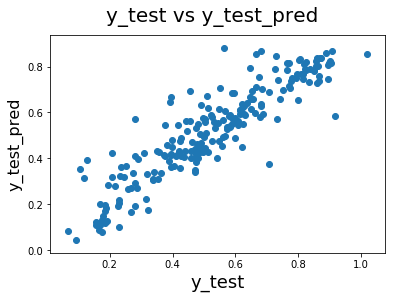

In [51]:
# Scatter plot to see how actual y_test varies with predicted y
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)                   
plt.ylabel('y_test_pred', fontsize=16)  
plt.show()
#the is a clear correlation between predicted and actual y values for test data

Measuring R-Squared for test data

In [52]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test,y_pred=y_test_pred)#r2 score 81% for test against 85% for train
#looks like the model is a good predictor of count for given parameters

0.8182270682379869

### --------------------------------------------End of Building Model - Part1------------------------------------------------

### --------------------------------------------------Building Model - Part2-----------------------------------------------------

We will use recursive feature elimination to build model with only important features and ignore others<br>
We will use sklearn to create an estimator model for RFE. 
We will also use stasmodels with important features generated by RFE

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

<b>Note:</b>We run the following RFE code several times to reduce the number of significant variables to as low as possible whicle still having good R-Squared compared to original<br>
If we decrease significant variables below 15, the test R-Square is falling close to 76%

In [54]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)#using sklearn linear regression, we are picking only top n number of significant features             
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))#list with independent variables, whether they are significant or not, and they significance ranking
#our derived metric, week of the month seems to have no impact on the demand as it didnt come in the top 15 features of RFE

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 12),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', False, 2),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', False, 16),
 ('weekday_Sun', False, 17),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 6),
 ('weathersit_Light_Snow/Rain', True, 1),
 ('weathersit_Misty', True, 1),
 ('week_of_month_2nd_Week', False, 10),
 ('week_of_month_3rd_Week', False, 7),
 ('week_of_month_4th_Week', False, 13)]

In [56]:
col = X_train.columns[rfe.support_]#list of columns that are significant as per our RFE output
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_winter',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Oct', 'weathersit_Light_Snow/Rain', 'weathersit_Misty'],
      dtype='object')

In [57]:
X_train.columns[~rfe.support_]#list of columns that are significant as per our RFE output

Index(['workingday', 'season_spring', 'season_summer', 'mnth_Aug', 'mnth_Jun',
       'mnth_May', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'week_of_month_2nd_Week',
       'week_of_month_3rd_Week', 'week_of_month_4th_Week'],
      dtype='object')

In [58]:
X_train_rfe = X_train[col]#subset with only with only significant variables
X_train_rfe = sm.add_constant(X_train_rfe)#adding constant
lr2 = sm.OLS(y_train,X_train_rfe).fit()#lr2 is model with reduced features

In [59]:
print(lr2.summary())#summary for model built with 15 significant variables
#probability of F-Statistic is very low
#P-Values of all 15 variables are very low, making them all significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.3
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          1.06e-185
Time:                        11:32:10   Log-Likelihood:                 494.40
No. Observations:                 510   AIC:                            -956.8
Df Residuals:                     494   BIC:                            -889.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif#seems like hum has the highest collinearity with other variables

,Features,VIF
3,hum,17.92
2,atemp,14.48
5,season_winter,5.51
4,windspeed,4.86
12,mnth_Oct,3.04
11,mnth_Nov,2.92
14,weathersit_Misty,2.42
6,mnth_Dec,2.20
0,yr,2.05
8,mnth_Jan,1.74


In [61]:
X_train_new1 = X_train_rfe.drop(['hum'], axis=1)#dropped humidity variable and rebuilding model

In [62]:
lr3 = sm.OLS(y_train,X_train_new1).fit()#fitting model again, lr3 is the new model

In [63]:
print(lr3.summary())#New R-squared is 83.5%, all other metrics look good

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.3
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          5.21e-183
Time:                        11:32:10   Log-Likelihood:                 485.27
No. Observations:                 510   AIC:                            -940.5
Df Residuals:                     495   BIC:                            -877.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [64]:
#checking VIF again
vif = pd.DataFrame()
X = X_train_new1.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif#season_winter has VIF of 5.49,slightly above 5, we will drop it and see if model if performing good

,Features,VIF
4,season_winter,5.49
3,windspeed,4.81
2,atemp,4.69
11,mnth_Oct,2.98
10,mnth_Nov,2.79
0,yr,2.04
5,mnth_Dec,1.95
13,weathersit_Misty,1.55
8,mnth_Jul,1.32
7,mnth_Jan,1.31


In [65]:
X_train_new2 = X_train_new1.drop(['season_winter'], axis=1)#dropped season_winter variable and rebuilding model
lr4 = sm.OLS(y_train,X_train_new2).fit()#fitting model again, lr4 is the new model
print(lr4.summary())#New R-squared is 81%, all other metrics look good
#but mnth_Nov has very high p-value, lets drop it in next step

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     170.5
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          1.79e-173
Time:                        11:32:10   Log-Likelihood:                 459.85
No. Observations:                 510   AIC:                            -891.7
Df Residuals:                     496   BIC:                            -832.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [66]:
#checking VIF again
vif = pd.DataFrame()
X = X_train_new2.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.79
2,atemp,4.60
0,yr,2.04
12,weathersit_Misty,1.54
6,mnth_Jan,1.31
7,mnth_Jul,1.31
5,mnth_Feb,1.24
4,mnth_Dec,1.23
8,mnth_Mar,1.21
10,mnth_Oct,1.17


In [67]:
X_train_new3 = X_train_new2.drop(['mnth_Nov'], axis=1)#dropped mnth_Nov variable(as it's p-value is high) and rebuilding model
lr5 = sm.OLS(y_train,X_train_new3).fit()#fitting model again, lr5 is the new model
print(lr5.summary())#New R-squared is 81%, all other metrics look good

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          2.53e-174
Time:                        11:32:10   Log-Likelihood:                 459.15
No. Observations:                 510   AIC:                            -892.3
Df Residuals:                     497   BIC:                            -837.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [68]:
#checking VIF again
vif = pd.DataFrame()
X = X_train_new3.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.65
2,atemp,4.59
0,yr,2.02
11,weathersit_Misty,1.54
7,mnth_Jul,1.30
6,mnth_Jan,1.29
5,mnth_Feb,1.22
4,mnth_Dec,1.21
8,mnth_Mar,1.19
9,mnth_Oct,1.16


Now, let's check the model fit and other metrics for <ins>both lr3 and lr4(season_winter dropped)</ins> to arrive at a conclusion

<b>Residual analysis</b> on the training data with <b>lr3</b><br>
Let's see if the residual errors follow gaussian distribution

In [69]:
y_train_pred = lr3.predict(X_train_new1)#predicting y values from training data

C:\Users\Venki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


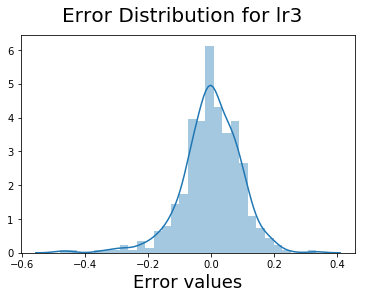

-2.874606870622587e-16

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Error Distribution for lr3', fontsize = 20)                  # Plot heading 
plt.xlabel('Error values', fontsize = 18)
plt.show()
#From the figure, we can say that errors are distributed around 0.0
np.mean(y_train - y_train_pred)#residual average is extremely small, almost zero
#the error distribution is in bell shape, this is gaussian

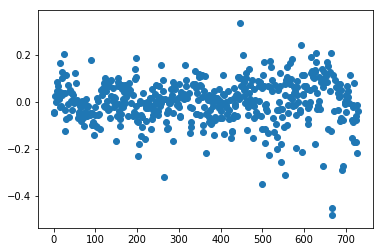

In [71]:
plt.scatter(pd.DataFrame(X_train_new1.index),(y_train - y_train_pred))#plotting the residuals w.r.t each x_train, it shouldnt follow any pattern
plt.show()
#there the residuals seem homoscedastic which seems to be a good sign of the model

<b>Residual analysis</b> on the training data with <b>lr4</b><br>
Let's see if the residual errors follow gaussian distribution

In [72]:
y_train_pred = lr4.predict(X_train_new2)

C:\Users\Venki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


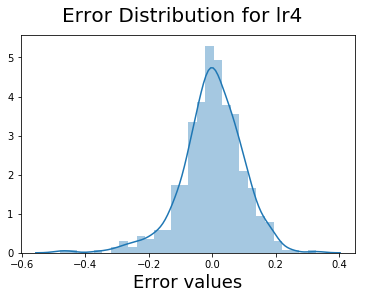

-2.695011969580282e-15

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Error Distribution for lr4', fontsize = 20)
plt.xlabel('Error values', fontsize = 18)
plt.show()
#From the figure, we can say that errors are distributed around 0.0
np.mean(y_train - y_train_pred)#residual average is extremely small, almost zero
#the error distribution is in bell shape, this is gaussian

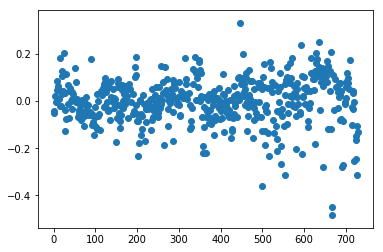

In [74]:
plt.scatter(pd.DataFrame(X_train_new2.index),(y_train - y_train_pred))
plt.show()
#there the residuals seem homoscedastic which seems to be a good sign of the model

<b>Residual analysis</b> on the training data with <b>lr5</b><br>
Let's see if the residual errors follow gaussian distribution

In [75]:
y_train_pred = lr5.predict(X_train_new3)

C:\Users\Venki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


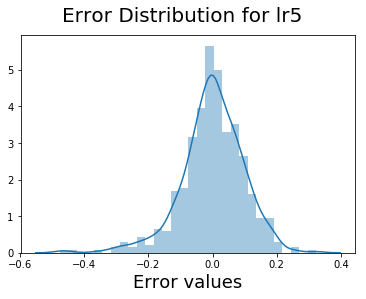

-3.708362593037165e-16

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Error Distribution for lr5', fontsize = 20)        
plt.xlabel('Error values', fontsize = 18)
plt.show()
#From the figure, we can say that errors are distributed around 0.0
np.mean(y_train - y_train_pred)#residual average is extremely small, almost zero
#the error distribution is in bell shape, this is gaussian

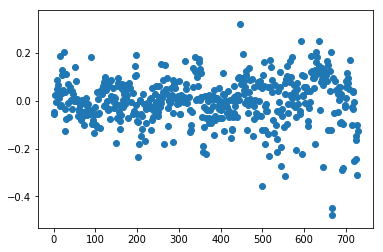

In [77]:
plt.scatter(pd.DataFrame(X_train_new3.index),(y_train - y_train_pred))
plt.show()
#there the residuals seem homoscedastic which seems to be a good sign of the model

<b>Predicting on test data with <ins>lr3</ins></b>

In [78]:
#preparing X_test and y_test
y_test = bike_data_test[['cnt']]
X_test = bike_data_test.drop('cnt',axis=1,inplace=False)
#print(X_test.columns)
X_test = X_test.drop(X_train.columns[~rfe.support_],axis=1,inplace=False)#dropping less significant columns
#print(X_test.columns)
X_test = X_test.drop('hum',axis=1,inplace=False)
#X_test = X_test.drop('hum',axis=1,inplace=False)#dropping collinear columns

In [79]:
X_test_lr3 = sm.add_constant(X_test)#adding constant column to X_test

y_test_pred = lr3.predict(X_test_lr3)#predict y for X_test with constant

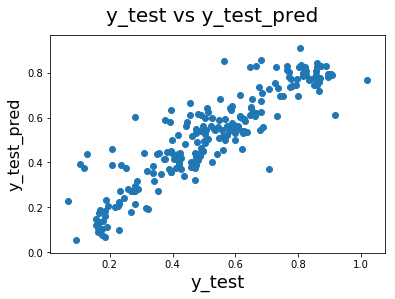

In [80]:
# Scatter plot to see how actual y_test varies with predicted y
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)                   
plt.ylabel('y_test_pred', fontsize=16)  
plt.show()
#the is a clear correlation between predicted and actual y values for test data

Measuring R-Squared for test data with lr3 model

In [81]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test,y_pred=y_test_pred)#r2 score 80% for test against 83% for lr3 train
#looks like the model is a good predictor of count for given parameters

0.8035892571135712

<b>Predicting on test data with <ins>lr4</ins></b>

In [82]:
#preparing X_test

X_test = X_test.drop('season_winter',axis=1,inplace=False)#already dropped 'hum' in previous cells


In [83]:
X_test_lr4 = sm.add_constant(X_test)

y_test_pred = lr4.predict(X_test_lr4)


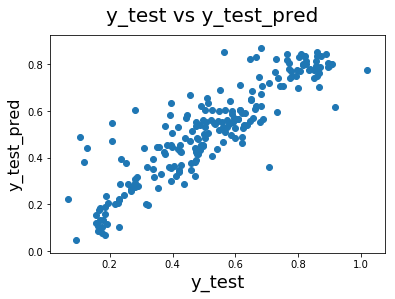

In [84]:
# Scatter plot to see how actual y_test varies with predicted y
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)                   
plt.ylabel('y_test_pred', fontsize=16)  
plt.show()
#the is a clear correlation between predicted and actual y values for test data

Measuring R-Squared for test data with lr4 model

In [85]:
r2_score(y_true=y_test,y_pred=y_test_pred)#r2 score 78% for test against 81% for lr4 train
#the model might still be a good predictor of count/demand

0.7867903687473189

<b>Predicting on test data with <ins>lr5</ins></b>

In [86]:
#preparing X_test

X_test = X_test.drop('mnth_Nov',axis=1,inplace=False)


In [87]:
X_test_lr5 = sm.add_constant(X_test)

y_test_pred = lr5.predict(X_test_lr5)


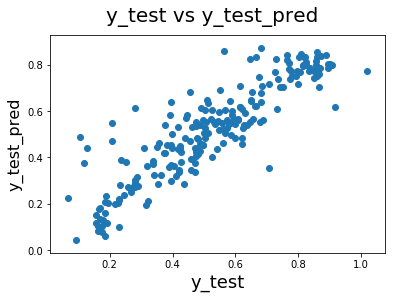

In [88]:
# Scatter plot to see how actual y_test varies with predicted y
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)                   
plt.ylabel('y_test_pred', fontsize=16)  
plt.show()
#the is a clear correlation between predicted and actual y values for test data

Measuring R-Squared for test data with lr5 model

In [89]:
r2_score(y_true=y_test,y_pred=y_test_pred)#r2 score 78% for test against 81% for lr5 train
#the model might still be a good predictor of count/demand
#lr4 and lr5 have very similar R-Squared values

0.7867056389260542

### -------------------------------------------End of Building Model - Part2-------------------------------------------------

### ------------------------------------------------------Conclusion------------------------------------------------------------

Going from original model with all variables(lr1) to lr5 with 12 variables, the R2 score of test data fell from 81 to 78. After comparing this to the r-squared of train data with lr1 which is 85, we decided to stop further dropping of variables as the model fit might reduce even further going from here. Also, P-values of all independent features included in lr5 are extremely low, making them significant. Also, VIF of all the remaining parameters is also lower than 5, ruling out the chance of collinearity.<br>
The features that retained in the last model lr5 are(hum, season_winter, mnth_Nov are dropped): 
'yr', 'holiday', 'atemp', 'windspeed',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Mar',
       'mnth_Oct', 'weathersit_Light_Snow/Rain', 'weathersit_Misty'

The model is defined as follows(constant value is 1):<br>
<ins>0.3004 + 0.25\*yr - 0.123\*holiday + 0.422\*atemp - 0.1361\*windspeed - 0.0741\*mnth_Dec - 0.1531\*mnth_Feb - 0.18\*mnth_Jan - 0.0625\*mnth_Jul - 0.0726\*mnth_Mar + 0.0509\*mnth_Oct - 0.2608\*weathersit_Light_Snow/Rain - 0.0751\*weathersit_Mis</ins>
<br>
Note: Prefixes are original categorical columns and reaiming part is one of its category.
<br>
<br>
example: In weathersit_Light_Snow/Rain, weathersit is the column name and Light_Snow/Rain is one of its category that we identified from data dictionary

<b>Inferences</b>: year increase and temperature are the biggest positive contirbutors to demand. Year on year, demand seems to increase by 25% when all other independent variables are constant. Increase in temperature from its lowest to higest causes increase in demand by about 42% when all other variables are fixed. Thats like 1.1% per increase in 1 degree in atemp
<br>
<br>
Other features like light snow,mist, holidays and certain months in the beginning of the year decrease the demand.

<b>Considerations:</b> We should note that when we drop dummy variable to avoid dummy variable trap, there is a possibility that we might actually be missing the better representative(dropped dummy variable's coefficient) of the whole category. But considering the overall scheme of things and considering that dummy variables within categories are mutually exclusive, their impact can be explained by the retained dummy variables.

In [90]:
df.atemp.min()
df.atemp.max()
df.atemp.max()-df.atemp.min()

38.0

In [91]:
42/(df.atemp.max()-df.atemp.min())#for every 1 degree range in temperature, demand raises by 1.1%

1.105263157894737